<a href="https://colab.research.google.com/github/amandayuan/data100_final_contraceptive/blob/master/contraceptive.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Data 100 Final Project: Contraceptive Analysis**

For our final project, we are using contraceptive datasets to address the following questions: 


1. What is the correlation between contraception prevalence and contraception method, and socioeconomic status?
2. What demographic and socioeconomic characteristics best predict current contraceptive method choice? 
3. What factors can be used to determine if a wife is still working after having children? 




Amanda: Pulled student contraceptive dataset and two external datasets, answered question 1 and in progress for question 2.

Esha: Added to Q2 lasso / visualization /feature selection working on Q3

Asha: Also working on number 3 - logistic regression and visulization, will try pca

In [0]:
import numpy as np
import pandas as pd

import matplotlib
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from matplotlib.colors import ListedColormap

import seaborn as sns

In [0]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn import tree
from sklearn import ensemble

In [0]:
#Given dataset 
birth_control = pd.read_csv('https://raw.githubusercontent.com/amandayuan/data100_final_contraceptive/master/data/contraceptive_for_students.csv')

#Imported datasets from different sources
country_original = pd.read_csv('https://raw.githubusercontent.com/amandayuan/data100_final_contraceptive/master/data/country_socioeconomic_status.csv')
prevalence_original = pd.read_csv('https://raw.githubusercontent.com/amandayuan/data100_final_contraceptive/master/data/prevalence_by_year.csv')

from sklearn.model_selection import train_test_split

train, test = train_test_split(birth_control, test_size=0.1, random_state=42)

I found two separate datasets that could assist in answering our questions: 


*   country_original lists each country and its standard of living in the 'IncomeGroup' column
*   prevalence_original lists the annual prevalence of contraception overall in each country between the years 1960 - 2019



In [201]:
birth_control

,wife_age,wife_education,husband_education,num_child,wife_religion,wife_work,husband_occupation,standard_living,media_exposure,contraceptive
0,24,2,3,3,1,1,2,3,0,1
1,45,1,3,10,1,1,3,4,0,1
2,43,2,3,7,1,1,3,4,0,1
3,42,3,2,9,1,1,3,3,0,1
4,36,3,3,8,1,1,3,2,0,1
...,...,...,...,...,...,...,...,...,...,...
1468,33,4,4,2,1,0,2,4,0,3
1469,33,4,4,3,1,1,1,4,0,3
1470,39,3,3,8,1,0,1,4,0,3
1471,33,3,3,4,1,0,2,2,0,3


In [202]:
country_original

,Country Code,Region,IncomeGroup,SpecialNotes,TableName,Unnamed: 5
0,ABW,Latin America & Caribbean,High income,NaN,Aruba,NaN
1,AFG,South Asia,Low income,NaN,Afghanistan,NaN
2,AGO,Sub-Saharan Africa,Lower middle income,NaN,Angola,NaN
3,ALB,Europe & Central Asia,Upper middle income,NaN,Albania,NaN
4,AND,Europe & Central Asia,High income,NaN,Andorra,NaN
...,...,...,...,...,...,...
258,XKX,Europe & Central Asia,Upper middle income,NaN,Kosovo,NaN
259,YEM,Middle East & North Africa,Low income,NaN,"Yemen, Rep.",NaN
260,ZAF,Sub-Saharan Africa,Upper middle income,Fiscal year end: March 31; reporting period fo...,South Africa,NaN
261,ZMB,Sub-Saharan Africa,Lower middle income,National accounts data were rebased to reflect...,Zambia,NaN


In [203]:
prevalence_original

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,Unnamed: 64
0,Aruba,ABW,"Contraceptive prevalence, any methods (% of wo...",SP.DYN.CONU.ZS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,AFG,"Contraceptive prevalence, any methods (% of wo...",SP.DYN.CONU.ZS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.3,NaN,NaN,10.3,NaN,13.6,18.6,NaN,22.8,NaN,21.8,21.2,NaN,NaN,NaN,22.5,NaN,NaN,NaN,NaN,NaN
2,Angola,AGO,"Contraceptive prevalence, any methods (% of wo...",SP.DYN.CONU.ZS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.1,NaN,NaN,NaN,NaN,6.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17.7,NaN,NaN,NaN,NaN,NaN,NaN,13.7,NaN,NaN,NaN,NaN
3,Albania,ALB,"Contraceptive prevalence, any methods (% of wo...",SP.DYN.CONU.ZS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,57.5,NaN,75.1,NaN,NaN,60.1,NaN,NaN,NaN,69.3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,46.0,NaN,NaN
4,Andorra,AND,"Contraceptive prevalence, any methods (% of wo...",SP.DYN.CONU.ZS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
259,Kosovo,XKX,"Contraceptive prevalence, any methods (% of wo...",SP.DYN.CONU.ZS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
260,"Yemen, Rep.",YEM,"Contraceptive prevalence, any methods (% of wo...",SP.DYN.CONU.ZS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.7,NaN,NaN,NaN,NaN,20.8,NaN,NaN,NaN,NaN,NaN,23.1,NaN,NaN,27.7,NaN,NaN,NaN,NaN,NaN,NaN,33.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN
261,South Africa,ZAF,"Contraceptive prevalence, any methods (% of wo...",SP.DYN.CONU.ZS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,48.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,49.7,NaN,57.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,56.3,NaN,NaN,NaN,NaN,59.9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,54.6,NaN,NaN,NaN,NaN
262,Zambia,ZMB,"Contraceptive prevalence, any methods (% of wo...",SP.DYN.CONU.ZS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15.2,NaN,NaN,NaN,25.9,NaN,NaN,22.0,NaN,NaN,34.2,NaN,NaN,NaN,NaN,40.8,NaN,NaN,NaN,NaN,NaN,NaN,49.0,NaN,NaN,NaN,NaN,NaN,NaN


In [204]:
country = country_original[['Country Code', 'Region', 'IncomeGroup', 'TableName']]
country = country.rename(columns={'TableName':'Country Name'})
country

,Country Code,Region,IncomeGroup,Country Name
0,ABW,Latin America & Caribbean,High income,Aruba
1,AFG,South Asia,Low income,Afghanistan
2,AGO,Sub-Saharan Africa,Lower middle income,Angola
3,ALB,Europe & Central Asia,Upper middle income,Albania
4,AND,Europe & Central Asia,High income,Andorra
...,...,...,...,...
258,XKX,Europe & Central Asia,Upper middle income,Kosovo
259,YEM,Middle East & North Africa,Low income,"Yemen, Rep."
260,ZAF,Sub-Saharan Africa,Upper middle income,South Africa
261,ZMB,Sub-Saharan Africa,Lower middle income,Zambia


In [205]:
prev = prevalence_original.drop(columns=['Indicator Name', 'Indicator Code', 'Unnamed: 64'])
prev

,Country Name,Country Code,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,Aruba,ABW,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,AFG,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.3,NaN,NaN,10.3,NaN,13.6,18.6,NaN,22.8,NaN,21.8,21.2,NaN,NaN,NaN,22.5,NaN,NaN,NaN,NaN
2,Angola,AGO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.1,NaN,NaN,NaN,NaN,6.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17.7,NaN,NaN,NaN,NaN,NaN,NaN,13.7,NaN,NaN,NaN
3,Albania,ALB,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,57.5,NaN,75.1,NaN,NaN,60.1,NaN,NaN,NaN,69.3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,46.0,NaN
4,Andorra,AND,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
259,Kosovo,XKX,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
260,"Yemen, Rep.",YEM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.7,NaN,NaN,NaN,NaN,20.8,NaN,NaN,NaN,NaN,NaN,23.1,NaN,NaN,27.7,NaN,NaN,NaN,NaN,NaN,NaN,33.5,NaN,NaN,NaN,NaN,NaN,NaN
261,South Africa,ZAF,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,48.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,49.7,NaN,57.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,56.3,NaN,NaN,NaN,NaN,59.9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,54.6,NaN,NaN,NaN
262,Zambia,ZMB,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15.2,NaN,NaN,NaN,25.9,NaN,NaN,22.0,NaN,NaN,34.2,NaN,NaN,NaN,NaN,40.8,NaN,NaN,NaN,NaN,NaN,NaN,49.0,NaN,NaN,NaN,NaN,NaN


## **Exploratory Data Analysis**

Below are some simple visualizations to see existing relationships between the different contraceptive types and other features in our data. 

Text(0.5, 1.0, 'Contraceptive Method and Age of Wife')

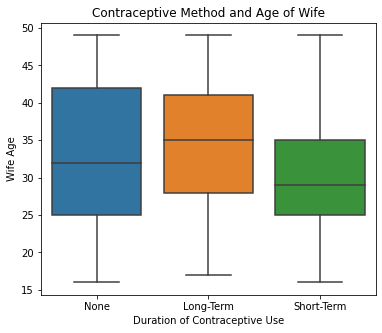

In [206]:
#Here I'm plotting the relationship between the contraceptive method used and the age of the wives

plt.figure(figsize=(6, 5))
sns.boxplot(data=birth_control, x='contraceptive', y='wife_age')
plt.xticks([0, 1, 2], ["None", "Long-Term", "Short-Term"])
plt.xlabel('Duration of Contraceptive Use')
plt.ylabel('Wife Age')
plt.title('Contraceptive Method and Age of Wife')

We can see that as women get older, they go from preferring short-term to none to long-term contraception. 

Below, we observe the distribution of wives' ages in our data: 

Text(0.5, 1.0, "Wives' Age Distribution")

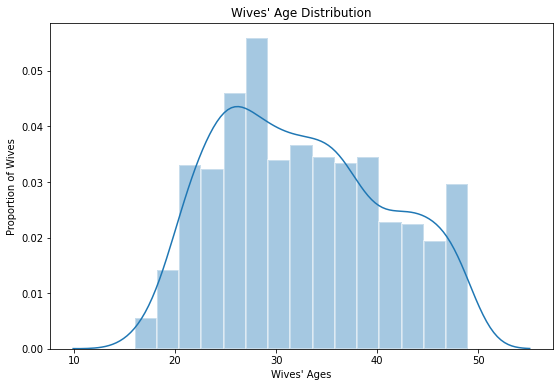

In [207]:
plt.figure(figsize=(9, 6))
sns.distplot(birth_control["wife_age"], hist_kws=dict(edgecolor="w", linewidth=2))
plt.xlabel("Wives' Ages")
plt.ylabel('Proportion of Wives')
plt.title("Wives' Age Distribution")

We can also take a look at the level of education for both the wives and husbands in our data: 

In [0]:
wife_educated_count = birth_control['wife_education'].value_counts()
husband_educated_count = birth_control['husband_education'].value_counts()

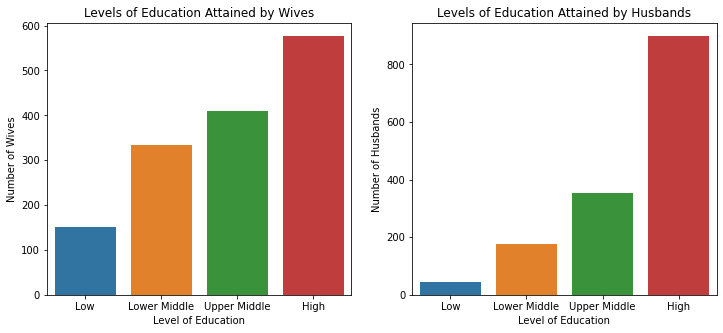

In [209]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.barplot(x=wife_educated_count.index, y=wife_educated_count)
plt.xticks([0, 1, 2, 3], ["Low", "Lower Middle", "Upper Middle", 'High'])
plt.xlabel('Level of Education')
plt.ylabel('Number of Wives')
plt.title('Levels of Education Attained by Wives')

plt.subplot(1, 2, 2)
sns.barplot(x=husband_educated_count.index, y=husband_educated_count)
plt.xticks([0, 1, 2, 3], ["Low", "Lower Middle", "Upper Middle", 'High'])
plt.xlabel('Level of Education')
plt.ylabel('Number of Husbands')
plt.title('Levels of Education Attained by Husbands');

We can see that both wives and husbands in our data are well-educated, with the highest level of education claiming the largest number in both groups.

In [0]:
education_contraception = pd.melt(birth_control[['contraceptive', 'wife_education', 'husband_education']], id_vars="contraceptive", var_name="education", value_name = 'level')

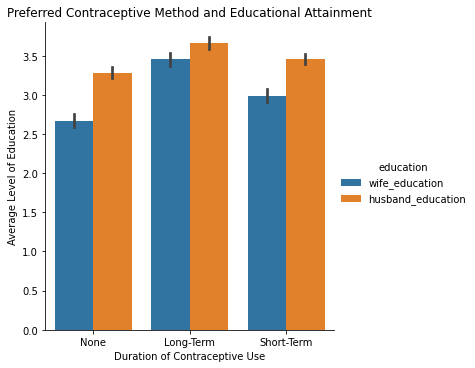

In [211]:
sns.catplot(x='contraceptive', y='level', hue='education', data=education_contraception, kind='bar')
plt.xticks([0, 1, 2], ["None", "Long-Term", "Short-Term"])
plt.xlabel('Duration of Contraceptive Use')
plt.ylabel('Average Level of Education')
plt.title('Preferred Contraceptive Method and Educational Attainment');

## **Question 1: What is the correlation between contraception prevalence and contraception method, and socioeconomic status?**

According to the dataset information (https://archive.ics.uci.edu/ml/datasets/Contraceptive+Method+Choice):

*   A higher standard-of-living index represents a higher standard of living overall (1 - lowest, 2, 3, 4 - highest)
*   The contraceptive methods used are among the following: 1 - No use, 2 - Long-term, 3 - Short-term

I decided to incorporate the foreign datasets to look at contraception prevalence (which is not really observed in the given dataset) in countries around the world. We first address the relationship between **contraception prevalence** and **socioeconomic status** in different countries around the world from one of the found datasets: 

In [0]:
country['IncomeGroup'] = country['IncomeGroup'].replace({'High income': '4', 'Upper middle income': '3', 'Lower middle income': '2', 'Low income': '1'}).fillna('0')

In [213]:
country_income = country[['Country Code', 'Region', 'Country Name', 'IncomeGroup']]
country_income

,Country Code,Region,Country Name,IncomeGroup
0,ABW,Latin America & Caribbean,Aruba,4
1,AFG,South Asia,Afghanistan,1
2,AGO,Sub-Saharan Africa,Angola,2
3,ALB,Europe & Central Asia,Albania,3
4,AND,Europe & Central Asia,Andorra,4
...,...,...,...,...
258,XKX,Europe & Central Asia,Kosovo,3
259,YEM,Middle East & North Africa,"Yemen, Rep.",1
260,ZAF,Sub-Saharan Africa,South Africa,3
261,ZMB,Sub-Saharan Africa,Zambia,2


In [0]:
#Initializing a new 'Recent Prevalence' column which shows the most recent value of contraception prevalence per country (in %)
prev['Recent Prevalence'] = 0 
prev = prev.fillna(0) 
years = prev.iloc[:, 2:-1]

In [215]:
length, width = years.shape 

#Replacing the initialized 0 in the 'Recent Prevalence' column with the most recent contraception prevalence
for i in range(width): 
  for j in range(length): 
    if years.iloc[j, i] != 0: 
      prev.loc[j,'Recent Prevalence'] = years.iloc[j, i]
      # changed prev['Recent Prevalence'].iloc[j] = years.iloc[j, i] to prevent warning

recent_prev = prev[['Country Name', 'Country Code', 'Recent Prevalence']]
recent_prev

,Country Name,Country Code,Recent Prevalence
0,Aruba,ABW,0.0
1,Afghanistan,AFG,22.5
2,Angola,AGO,13.7
3,Albania,ALB,46.0
4,Andorra,AND,0.0
...,...,...,...
259,Kosovo,XKX,0.0
260,"Yemen, Rep.",YEM,33.5
261,South Africa,ZAF,54.6
262,Zambia,ZMB,49.0


In the above cell, I created a new 'Recent' column to take the most recent contraception prevalence. I used this information for data analysis because contraception was invented around the 1960s, and I believed that data from earlier years would not reflect the shifting attitudes towards contraceptives over time.

To clean the data, I merged the dataframes for income group and contraception prevalence on the country name/code, and filtered out the conditions where income group is zero (which means there is no/insufficient data about the socioeconomic status of the country in question) and the prevalence is zero (which means that there is no data about the contraception prevalence between the years 1960-2019).

In [0]:
income_prevalence = country_income.merge(recent_prev, how='inner', on=['Country Code', 'Country Name'])
income_data = income_prevalence[(income_prevalence['IncomeGroup'] != '0') & (income_prevalence['Recent Prevalence'] != 0)]

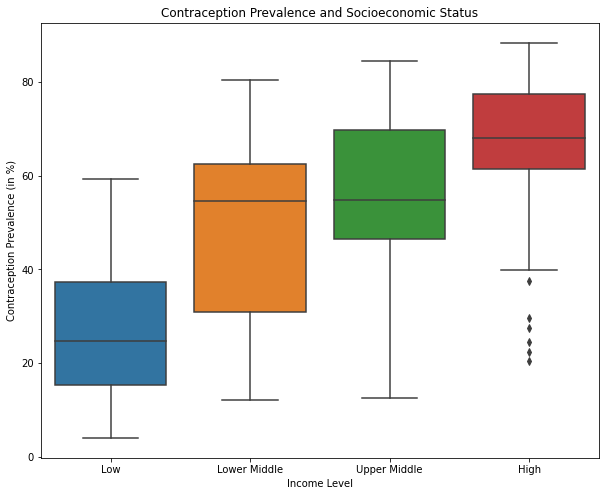

In [217]:
plt.figure(figsize=(10, 8))
sns.boxplot(data=income_data, x='IncomeGroup', y='Recent Prevalence')
plt.xticks([0, 1, 2, 3], ["Low", "Lower Middle", "Upper Middle", 'High'])
plt.xlabel('Income Level')
plt.ylabel('Contraception Prevalence (in %)')
plt.title('Contraception Prevalence and Socioeconomic Status');

In [218]:
income_data['IncomeGroup Int'] = income_data['IncomeGroup'].astype(int)
income_data

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Country Code,Region,Country Name,IncomeGroup,Recent Prevalence,IncomeGroup Int
1,AFG,South Asia,Afghanistan,1,22.5,1
2,AGO,Sub-Saharan Africa,Angola,2,13.7,2
3,ALB,Europe & Central Asia,Albania,3,46.0,3
6,ARE,Middle East & North Africa,United Arab Emirates,4,27.5,4
7,ARG,Latin America & Caribbean,Argentina,3,81.3,3
...,...,...,...,...,...,...
248,WSM,East Asia & Pacific,Samoa,3,26.9,3
250,YEM,Middle East & North Africa,"Yemen, Rep.",1,33.5,1
251,ZAF,Sub-Saharan Africa,South Africa,3,54.6,3
252,ZMB,Sub-Saharan Africa,Zambia,2,49.0,2


As we can see from the boxplot, as income level rises, contraception prevalence appears to rise as well; this shows a positive correlation between the two variables. 

Next, we will examine the relationship between **contraception method** and **socioeconomic status**: 

In [219]:
bc_socio = birth_control[['standard_living', 'contraceptive']]
bc_socio

,standard_living,contraceptive
0,3,1
1,4,1
2,4,1
3,3,1
4,2,1
...,...,...
1468,4,3
1469,4,3
1470,4,3
1471,2,3


In [220]:
bc1 = bc_socio[bc_socio['contraceptive']==1]['standard_living'].mean()
bc2 = bc_socio[bc_socio['contraceptive']==2]['standard_living'].mean()
bc3 = bc_socio[bc_socio['contraceptive']==3]['standard_living'].mean()
[bc1, bc2, bc3]

[2.95389507154213, 3.4684684684684686, 3.136986301369863]

Text(6.674999999999997, 0.5, 'Standard of Living')

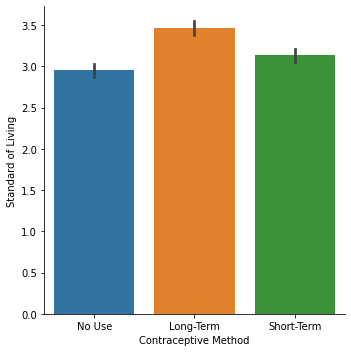

In [221]:
sns.catplot(data=bc_socio, x='contraceptive', y='standard_living', kind='bar')
plt.xticks([0, 1, 2], ["No Use", "Long-Term", "Short-Term"])
plt.xlabel('Contraceptive Method')
plt.ylabel('Standard of Living')

In [222]:
type(bc_socio['standard_living'].iloc[0])

numpy.int64

(talk about how long-term contraception is the best) 

## **Question 2: How can we best predict current contraceptive method choice based on demographic and socioeconomic characteristics?**

### **Method 1: Cross-Validation**

First, we will perform **cross-validation** on our 'train' set, which was retrieved by conducting a train-test split on our original dataset. 

In [223]:
#Here we retrieve the training and validation sets for cross-validation
bc_train, val = train_test_split(train, test_size=0.1, random_state=42)
bc_train

,wife_age,wife_education,husband_education,num_child,wife_religion,wife_work,husband_occupation,standard_living,media_exposure,contraceptive
989,26,3,2,5,1,1,2,2,0,3
658,32,2,3,5,1,0,2,3,0,3
1060,42,4,4,1,1,0,1,4,0,1
1287,24,4,4,1,0,1,2,3,0,2
109,26,2,3,3,1,1,3,1,0,1
...,...,...,...,...,...,...,...,...,...,...
150,44,4,4,3,1,1,2,4,0,1
1384,36,4,4,3,1,1,1,4,0,3
747,44,4,4,11,1,1,1,4,0,3
675,49,4,3,13,1,1,1,4,0,3


To begin, we one-hot-encode the wife's and husband's education levels, and the standard of living because they are all categorical variables (1 = low, 2, 3, 4 = high). 

Even though these categorical variables were encoded numerically, we still want to one-hot-encode (and not treat them as numerical variables) because we want to treat each level of education and standard of living equally instead of assigning a higher education level/standard of living more weight. 

In [0]:
#One-hot-encoding wife education levels

def wife_edu(data='train'): 
  if (data=='test'):
    wife_ohe = pd.get_dummies(test['wife_education'])
  elif (data=='val'):
    wife_ohe = pd.get_dummies(val['wife_education'])
  elif (data == 'crossval_train'):
    wife_ohe = pd.get_dummies(bc_train['wife_education'])
  else:
    wife_ohe = pd.get_dummies(train['wife_education'])
  wife_ohe = wife_ohe.rename(columns={1: 'w1', 2: 'w2', 3: 'w3', 4: 'w4'})
  return wife_ohe

In [0]:
#One-hot-encoding husband education levels

def husband_edu(data='train'): 
  if (data=='test'):
    husband_ohe = pd.get_dummies(test['husband_education'])
  elif (data=='val'):
    husband_ohe = pd.get_dummies(val['husband_education'])
  elif (data == 'crossval_train'):
    husband_ohe = pd.get_dummies(bc_train['husband_education'])
  else:
    husband_ohe = pd.get_dummies(train['husband_education'])

  husband_ohe = husband_ohe.rename(columns={1: 'h1', 2: 'h2', 3: 'h3', 4: 'h4'})
  return husband_ohe

In [0]:
#One-hot-encoding standard of living

def living_standard(data='train'): 
  if (data=='test'):
    living_ohe = pd.get_dummies(test['standard_living'])
  elif (data=='val'):
    living_ohe = pd.get_dummies(val['standard_living'])
  elif (data == 'crossval_train'):
    living_ohe = pd.get_dummies(bc_train['standard_living'])
  else:
    living_ohe = pd.get_dummies(train['standard_living'])
  living_ohe = living_ohe.rename(columns={1: 'l1', 2: 'l2', 3: 'l3', 4: 'l4'})
  return living_ohe

Now, we combine the birth control training set with the one-hot-encoded wife and husband education levels:

In order to identify the best columns to use for our classification, we plotted a heatmap of correlations. When choosing features by looking at correlations we usually disregard one of two columns if they have very high correlations with one another; however in our situation the highest correlation was 0.61 between husband and wife education which even then is not too high. Thus, we opted to select most of the columns in the dataset. We chose to use wife_age, wife_eduction, husband_education, num_child, standard_living, and media_exposure. 

I was not initially planning on using num_child because it has the smallest correlation with contraceptive among the previous features. Strangely enough, it made our predictor much more accurate.

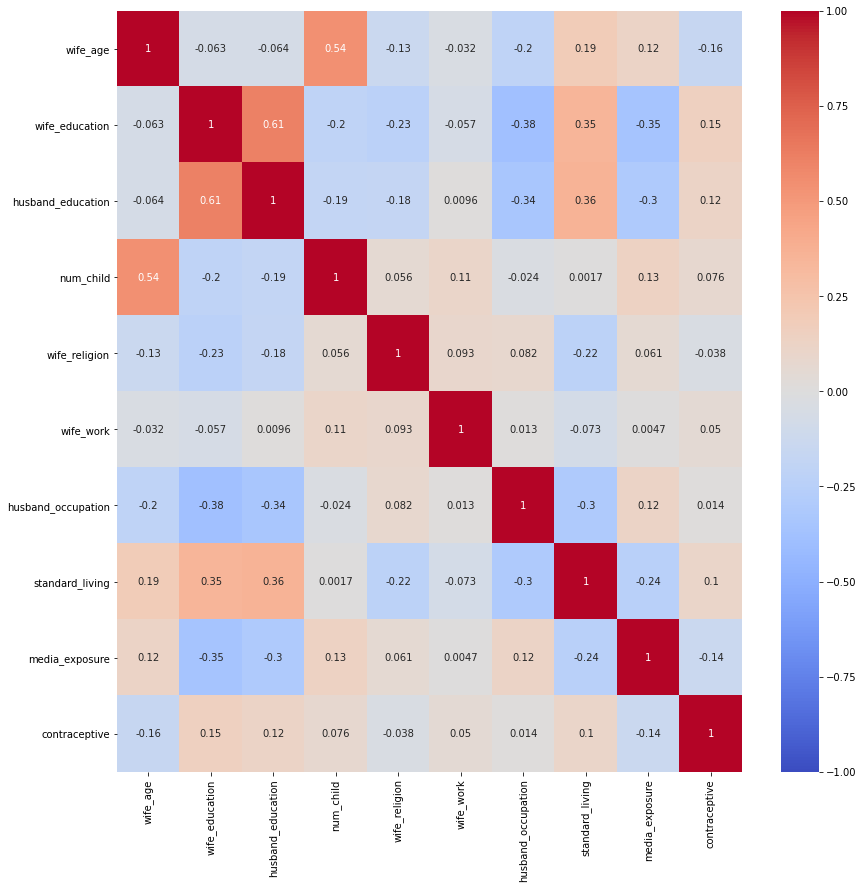

In [227]:
plt.figure(figsize=(14,14))
sns.heatmap(bc_train.corr(), annot=True, cmap='coolwarm', vmin=-1);

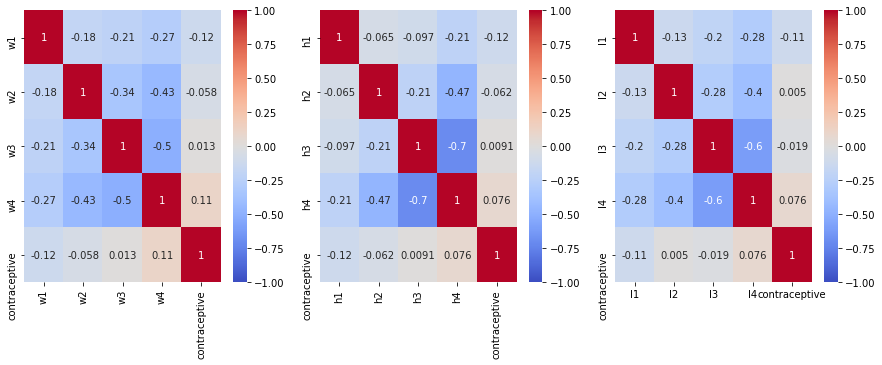

In [228]:
plt.figure(figsize=(15,5))

plt.subplot(1, 3, 1)
sns.heatmap(pd.concat([wife_edu('train'), bc_train['contraceptive']], axis=1).corr(), annot=True, cmap='coolwarm', vmin=-1);

plt.subplot(1, 3, 2)
sns.heatmap(pd.concat([husband_edu('train'), bc_train['contraceptive']], axis=1).corr(), annot=True, cmap='coolwarm', vmin=-1);

plt.subplot(1, 3, 3)
sns.heatmap(pd.concat([living_standard('train'), bc_train['contraceptive']], axis=1).corr(), annot=True, cmap='coolwarm', vmin=-1);


In [0]:
def data_test(data='train'): 
  if (data=='test'):
    df = test
  elif (data=='val'):
    df = val
  elif (data == 'crossval_train'):
    df = bc_train
  else:
    df = train
  original = df[['wife_age', 'num_child', 'media_exposure']]
  bc_train.fillna(0)
  
  final = pd.concat([original, wife_edu(data), husband_edu(data)], axis=1)
  return final

We first try to use logistic regression as a predictor: 

In [230]:
from sklearn.linear_model import LogisticRegression

X_valtrain = data_test(data='crossval_train')
Y_valtrain = bc_train['contraceptive']

logistic_reg = LogisticRegression(penalty='l2', max_iter=1000)
logistic_reg.fit(X_valtrain, Y_valtrain)

crossval_training_accuracy = (logistic_reg.predict(X_valtrain) == Y_valtrain).mean()
print("Training Accuracy for Cross Validation:", crossval_training_accuracy)

Training Accuracy for Cross Validation: 0.535234899328859


In [231]:
X_val = data_test(data='val')
Y_val = val['contraceptive']

val_accuracy = (logistic_reg.predict(X_val) == Y_val).mean()
print("Validation Accuracy:", val_accuracy)

Validation Accuracy: 0.5338345864661654


In [232]:
X_train = data_test(data = 'train')
Y_train = train['contraceptive']
logistic_reg.fit(X_train,train['contraceptive'])

training_accuracy = (logistic_reg.predict(X_train) == train['contraceptive']).mean()
print('Training Accuracy:', training_accuracy)

Training Accuracy: 0.5358490566037736


In [233]:
X_test = data_test(data='test')
Y_test = test['contraceptive']
test_accuracy = (logistic_reg.predict(X_test) == test['contraceptive']).mean()
print("Testing Accuracy:", test_accuracy)

Testing Accuracy: 0.5472972972972973


From cross-validation alone, we get a pretty low training, validation, and testing accuracy across the board, sitting at a little over 50%. We can probably explain this by looking at the precision and recall of our model: 

In [0]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(penalty='l2', max_iter=1000)
model.fit(X_train.sort_index(), Y_train.sort_index())

Y_train_hat = model.predict(X_train.sort_index())

We first calculate the precision and recall for the no contraceptive use condition: 

In [0]:
tp1 = (Y_train_hat == 1) & (Y_train == 1)
tn1 = (Y_train_hat != 1) & (Y_train != 1)
fp1 = (Y_train_hat == 1) & (Y_train != 1)
fn1 = (Y_train_hat != 1) & (Y_train == 1)

logistic_predictor_precision_1 = np.sum(tp1) / (np.sum(tp1) + np.sum(fp1))
logistic_predictor_recall_1 = np.sum(tp1) / (np.sum(tp1) + np.sum(fn1))
#logistic_predictor_far_1 = np.sum(fp1)/(np.sum(fp1)+ np.sum(tn1))

In [236]:
print('Logistic Regression Model Precision:',logistic_predictor_precision_1)
print('Logistic Regression Model Recall:',logistic_predictor_recall_1)

Logistic Regression Model Precision: 0.40863787375415284
Logistic Regression Model Recall: 0.4392857142857143


Since the precision is smaller than the recall, we can tell that there are more false positives than negatives for the no contraceptive use condition. This means that there are more long-term or short-term contraceptive use data being misflagged as no contraceptive use. 


In [237]:
accuracy_1 = (np.sum(tp1) + np.sum(tn1))/ (np.sum(tp1) + np.sum(fp1) + np.sum(tn1) + np.sum(fn1))
print('Accuracy:',accuracy_1)

Accuracy: 0.49433962264150944


The accuracy of our model for predicting no contraceptive use is at around 49%. 

Next, we calculate the precision and recall for the long-term contraceptive use condition: 

In [0]:
tp2 = (Y_train_hat == 2) & (Y_train == 2)
tn2 = (Y_train_hat != 2) & (Y_train != 2)
fp2 = (Y_train_hat == 2) & (Y_train != 2)
fn2 = (Y_train_hat != 2) & (Y_train == 2)

logistic_predictor_precision_2 = np.sum(tp2) / (np.sum(tp2) + np.sum(fp2))
logistic_predictor_recall_2 = np.sum(tp2) / (np.sum(tp2) + np.sum(fn2))
#logistic_predictor_far_2 = np.sum(fp2)/(np.sum(fp2)+ np.sum(tn2))

In [239]:
print('Logistic Regression Model Precision:',logistic_predictor_precision_2)
print('Logistic Regression Model Recall:',logistic_predictor_recall_2)

Logistic Regression Model Precision: 0.20725388601036268
Logistic Regression Model Recall: 0.1342281879194631


Since our precision is larger than the recall, we can tell that there are more false negatives than positives for the long-term contraceptive use condition. This means that there are more long-term uses being mislabeled as no or short-term use. 


In [240]:
accuracy_2 = (np.sum(tp2) + np.sum(tn2))/ (np.sum(tp2) + np.sum(fp2) + np.sum(tn2) + np.sum(fn2))
print('Accuracy:',accuracy_2)

Accuracy: 0.689811320754717


The accuracy of our model for predicting long-term contraceptive use is at around 68%. 

Finally, we calculate the precision and recall for the short-term contraceptive use condition: 

In [0]:
tp3 = (Y_train_hat == 3) & (Y_train == 3)
tn3 = (Y_train_hat != 3) & (Y_train != 3)
fp3 = (Y_train_hat == 3) & (Y_train != 3)
fn3 = (Y_train_hat != 3) & (Y_train == 3)

logistic_predictor_precision_3 = np.sum(tp3) / (np.sum(tp3) + np.sum(fp3))
logistic_predictor_recall_3 = np.sum(tp3) / (np.sum(tp3) + np.sum(fn3))
#logistic_predictor_far_3 = np.sum(fp3)/(np.sum(fp3)+ np.sum(tn3))

In [242]:
print('Logistic Regression Model Precision:',logistic_predictor_precision_3)
print('Logistic Regression Model Recall:',logistic_predictor_recall_3)

Logistic Regression Model Precision: 0.35094339622641507
Logistic Regression Model Recall: 0.39828693790149894


Since our precision is smaller than the recall, we can tell that there are more false positives than negatives for the short-term contraceptive use condition. This means that there are more long-term or no use being flagged as short-term use. 

In [243]:
accuracy_3 = (np.sum(tp3) + np.sum(tn3))/ (np.sum(tp3) + np.sum(fp3) + np.sum(tn3) + np.sum(fn3))
print('Accuracy:',accuracy_3)

Accuracy: 0.5283018867924528


The accuracy of our model for predicting short-term contraceptive use is at around 53%. 

For both no- and short-term contraceptive use, we see that more data is being misflagged as no- and short-term use. On the other hand, there are more long-term use data that are being misflagged as something else. Thus, our model is likely overestimating the number of people using long-term contraceptives because it seems to be at the expense of predicting no and short-term use. 

I think the number of long-term contraceptive use is being overestimated due to the features in our data being more inclined towards long-term contraceptive use; for instance, two of the features that we are using are wife's and husband's education. From the EDA we conducted earlier, we can see that in our data, most of the wives and husbands belong to the highest level of educational attainment, which is correlated with long-term contraceptive use. 

### **Method 2: One vs. Rest Classifier**

In [244]:
logistic_reg_ovr = LogisticRegression(multi_class = 'ovr', max_iter=500)
logistic_reg_ovr.fit(X_train, Y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=500,
                   multi_class='ovr', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [245]:
logistic_reg_ovr.score(X_train, Y_train)

0.5335849056603773

### **Method 3: Decision Tree Classifier**

We wanted to try using a decision tree classifier since we would be able to classify without using only linear boundaries as logistic regression lets us. 

In [246]:
decision_tree_model = tree.DecisionTreeClassifier(random_state=100)
decision_tree_model.fit(X_train, Y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=100, splitter='best')

Since Decision trees learn new rules for decision on a class by looking at features we wanted to know what type of data would be most beneficial. 

We decided to compare the one_hot_encoded data used/chosen for our logistic regression model with using all features without one_hot_encoding since we wanted to try to maximize the amount of features the model had to select on as well as reduce the sparsity.


https://towardsdatascience.com/one-hot-encoding-is-making-your-tree-based-ensembles-worse-heres-why-d64b282b5769
-by consulting some sources as the one above we were able to see that typically we do not have to one_hot_encode and in some cases it is encouraged to reduce the sparsity and selection.

1. **Using the same features**

```
['wife_age', 'num_child', 'media_exposure',ohe('wife_edu'), ohe('husb_edu')]
```



In [247]:
decision_tree_model = tree.DecisionTreeClassifier(random_state=100)
decision_tree_model.fit(X_train, Y_train)
dt_training_accuracy = decision_tree_model.score(X_train, Y_train)
dt_test_accuracy = decision_tree_model.score(X_test, Y_test)
print("Training Accuracy: " + str(dt_training_accuracy))
print ("Test Accuracy: " + str(dt_test_accuracy))

Training Accuracy: 0.8090566037735849
Test Accuracy: 0.5675675675675675


As we can see from these results, the training accuracy is much higher than the test. We want to avoid overfitting to training data. Thus, we might want to limit the height of our tree by potentially limiting how deep it grows.

Depth: 5 Training Accuracy: 0.5758490566037736 Test Accuracy: 0.581081081081081
Depth: 10 Training Accuracy: 0.6747169811320755 Test Accuracy: 0.5608108108108109
Depth: 15 Training Accuracy: 0.7871698113207547 Test Accuracy: 0.5675675675675675
Depth: 20 Training Accuracy: 0.8090566037735849 Test Accuracy: 0.5675675675675675
Depth: 25 Training Accuracy: 0.8090566037735849 Test Accuracy: 0.5675675675675675
Depth: 30 Training Accuracy: 0.8090566037735849 Test Accuracy: 0.5675675675675675
Depth: 35 Training Accuracy: 0.8090566037735849 Test Accuracy: 0.5675675675675675
Depth: 40 Training Accuracy: 0.8090566037735849 Test Accuracy: 0.5675675675675675
Depth: 45 Training Accuracy: 0.8090566037735849 Test Accuracy: 0.5675675675675675

Ideal Depth: 4
Training Accuracy: 0.5758490566037736
Validation Accuracy: 0.581081081081081



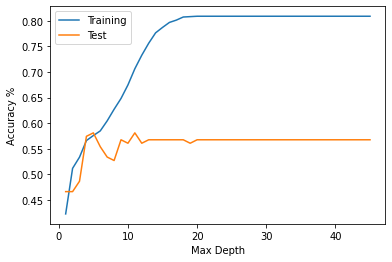

In [248]:
def select_max_depth(decision_tree_model, X_train, Y_train, X_test, Y_test):
  des_depth = []
  des_train = []
  des_test = []
  for i in range(1, 46):
    decision_tree_model = tree.DecisionTreeClassifier(random_state=100,max_depth=i)
    decision_tree_model.fit(X_train, Y_train)
    dt_training_accuracy = decision_tree_model.score(X_train, Y_train)
    dt_test_accuracy = decision_tree_model.score(X_test, Y_test)
    if(i%5 == 0):
        print("Depth: " + str(i) + " Training Accuracy: " + str(dt_training_accuracy) + " Test Accuracy: " + str(dt_test_accuracy))
    des_depth.append(i)
    des_train.append(dt_training_accuracy)
    des_test.append(dt_test_accuracy)

  print("\nIdeal Depth: " + str(np.argmax(des_test)))
  print("Training Accuracy: " + str(des_train[np.argmax(des_test)]))
  print("Validation Accuracy: " + str(des_test[np.argmax(des_test)]) + "\n")

  plt.plot(des_depth,des_train, des_depth,des_test)
  plt.ylabel('Accuracy %')
  plt.xlabel('Max Depth')
  plt.legend(["Training","Test"])
  plt.show()

select_max_depth(decision_tree_model, X_train, Y_train, X_test, Y_test)

As we can see with this with a lower training accuracy our validation accuracy increases. Thus, we should tend towards not as tall of a tree.

**2. Using all features:** 

```
['wife_age', 'wife_education', 'husband_education', 'num_child','wife_religion', 'wife_work', 'husband_occupation', 'standard_living','media_exposure', 'contraceptive']
```



In [249]:
X_train_plain = train.iloc[:,:-1]
Y_train_plain = train['contraceptive']
X_test_plain = test.iloc[:,:-1]
Y_test_plain = test['contraceptive']
decision_tree_model_plain = tree.DecisionTreeClassifier(random_state=100)
decision_tree_model_plain.fit(X_train_plain, Y_train_plain)
dt_training_accuracy_plain = decision_tree_model_plain.score(X_train_plain, Y_train_plain)
dt_test_accuracy_plain = decision_tree_model_plain.score(X_test_plain, Y_test_plain)
decision_tree_model_plain.predict(X_test_plain)
print('Training_accuracy:',dt_training_accuracy_plain)
print('Test_accuracy:',dt_test_accuracy_plain) 

Training_accuracy: 0.9569811320754718
Test_accuracy: 0.5675675675675675


Very high training accuracy due to overfitting -> need to tune parameters

Depth: 5 Training Accuracy: 0.5849056603773585 Test Accuracy: 0.5675675675675675
Depth: 10 Training Accuracy: 0.7237735849056603 Test Accuracy: 0.5540540540540541
Depth: 15 Training Accuracy: 0.9086792452830189 Test Accuracy: 0.5472972972972973
Depth: 20 Training Accuracy: 0.9554716981132075 Test Accuracy: 0.5675675675675675
Depth: 25 Training Accuracy: 0.9569811320754718 Test Accuracy: 0.5675675675675675
Depth: 30 Training Accuracy: 0.9569811320754718 Test Accuracy: 0.5675675675675675
Depth: 35 Training Accuracy: 0.9569811320754718 Test Accuracy: 0.5675675675675675
Depth: 40 Training Accuracy: 0.9569811320754718 Test Accuracy: 0.5675675675675675
Depth: 45 Training Accuracy: 0.9569811320754718 Test Accuracy: 0.5675675675675675

Ideal Depth: 5
Training Accuracy: 0.5962264150943396
Validation Accuracy: 0.5878378378378378



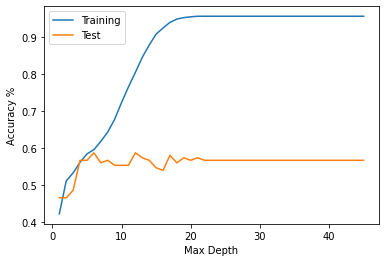

In [250]:
select_max_depth(decision_tree_model_plain, X_train_plain, Y_train_plain, X_test_plain, Y_test_plain)

Looked into other parameters such as criterion which identifies the impurity measures for classification. The two types are Entropy and Gini(default). Entropy measures how evenly distibutec the pobabilities from one node are. We want to try to achieve 0 entropy by classifying the node to one particular class. Gini, the other type of criterion is the probability that we incorrectly classify.

[Entropy/Gini](https://www.bogotobogo.com/python/scikit-learn/scikt_machine_learning_Decision_Tree_Learning_Informatioin_Gain_IG_Impurity_Entropy_Gini_Classification_Error.php)


In [251]:
decision_tree_model_plain = tree.DecisionTreeClassifier(criterion='entropy',random_state=100,max_depth=6)
decision_tree_model_plain.fit(X_train_plain, Y_train_plain)
dt_training_accuracy_plain = decision_tree_model_plain.score(X_train_plain, Y_train_plain)
dt_test_accuracy_plain = decision_tree_model_plain.score(X_test_plain, Y_test_plain)
print('Training_accuracy:',dt_training_accuracy_plain)
print('Test_accuracy:',dt_test_accuracy_plain) 

Training_accuracy: 0.5916981132075472
Test_accuracy: 0.581081081081081


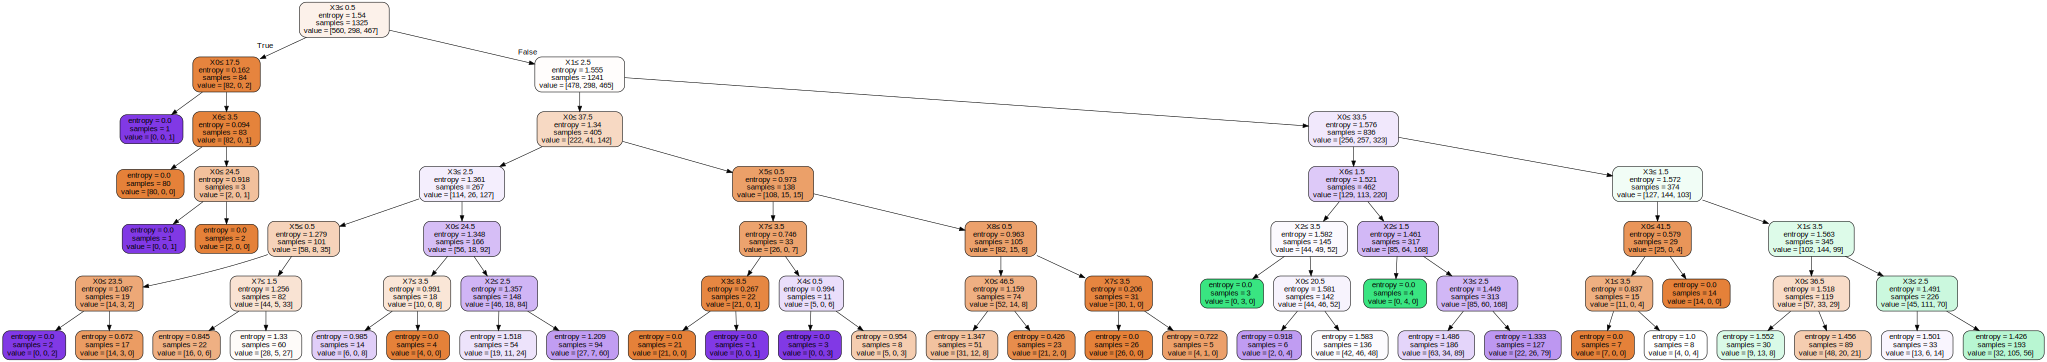

In [252]:
import graphviz
dot_data = tree.export_graphviz(decision_tree_model_plain, out_file=None, 
                      filled=True, rounded=True,  
                      special_characters=True)  
graph = graphviz.Source(dot_data)
graph.render(format="png", filename="iris_tree")
graph

As we can see our final decision tree that we choose to use has a max depth of 6 and gives a **training accuracy of 0.586** and a **testing accuracy of 0.601**. The structure of our tree is shown above.

### **Method 4: Random Forest Classifier**

Following the same procedure for RFC:

Depth: 5 Training Accuracy: 0.609056603773585 Test Accuracy: 0.5472972972972973
Depth: 10 Training Accuracy: 0.8301886792452831 Test Accuracy: 0.5945945945945946
Depth: 15 Training Accuracy: 0.9539622641509434 Test Accuracy: 0.5675675675675675
Depth: 20 Training Accuracy: 0.9569811320754718 Test Accuracy: 0.5743243243243243
Depth: 25 Training Accuracy: 0.9569811320754718 Test Accuracy: 0.5608108108108109
Depth: 30 Training Accuracy: 0.9569811320754718 Test Accuracy: 0.5608108108108109
Depth: 35 Training Accuracy: 0.9569811320754718 Test Accuracy: 0.5608108108108109
Depth: 40 Training Accuracy: 0.9569811320754718 Test Accuracy: 0.5608108108108109
Depth: 45 Training Accuracy: 0.9569811320754718 Test Accuracy: 0.5608108108108109

Ideal Depth: 7
Training Accuracy: 0.7116981132075472
Test Accuracy: 0.6013513513513513



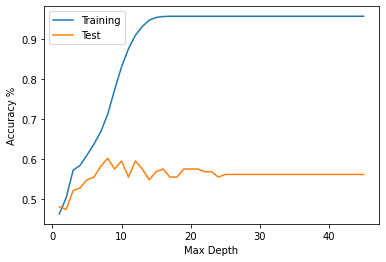

In [253]:
random_forest_model = ensemble.RandomForestClassifier(criterion="gini",n_estimators=100, random_state=42,max_depth=8)
random_forest_model.fit(X_train_plain, Y_train_plain)

rf_train_accuracy = random_forest_model.score(X_train_plain, Y_train_plain)
rf_test_accuracy = random_forest_model.score(X_test_plain, Y_test_plain)

des_depth = []
des_train = []
des_test = []
for i in range(1, 46):
  random_forest_model = ensemble.RandomForestClassifier(random_state=100,max_depth=i)
  random_forest_model.fit(X_train_plain, Y_train_plain)
  dt_training_accuracy = random_forest_model.score(X_train_plain, Y_train_plain)
  dt_test_accuracy = random_forest_model.score(X_test_plain, Y_test_plain)
  if(i%5 == 0):
      print("Depth: " + str(i) + " Training Accuracy: " + str(dt_training_accuracy) + " Test Accuracy: " + str(dt_test_accuracy))
  des_depth.append(i)
  des_train.append(dt_training_accuracy)
  des_test.append(dt_test_accuracy)
print("\nIdeal Depth: " + str(np.argmax(des_test)))
print("Training Accuracy: " + str(des_train[np.argmax(des_test)]))
print("Test Accuracy: " + str(des_test[np.argmax(des_test)]) + "\n")

plt.plot(des_depth,des_train, des_depth,des_test)
plt.ylabel('Accuracy %')
plt.xlabel('Max Depth')
plt.legend(["Training","Test"])
plt.show()

### **Method 5: Lasso Regularization**

In [0]:
from sklearn.linear_model import Lasso, LogisticRegression
from sklearn.feature_selection import SelectFromModel
from sklearn.preprocessing import StandardScaler

See if we can re-evaluate feature selection using Lasso regularization. After evaluating we see that we should opt to use all the columns if possible.

In [255]:
scaler = StandardScaler()
scaler.fit(X_train.fillna(0))
sel_ = SelectFromModel(LogisticRegression(C=1, penalty='l1',solver='liblinear' ))
sel_.fit(scaler.transform(X_train.fillna(0)), Y_train)
selected_feat = X_train.columns[(sel_.get_support())]
selected_feat

Index(['wife_age', 'num_child', 'media_exposure', 'w1', 'w2', 'w4', 'h1', 'h2',
       'h3', 'h4'],
      dtype='object')

In [256]:
model_lasso =  LogisticRegression(solver='liblinear',penalty='l1')
model_lasso.fit(X_train, Y_train)
training_accuracy = (model_lasso.predict(X_train) == Y_train).mean()
print("Training Accuracy:", training_accuracy)

Training Accuracy: 0.5335849056603773


In [257]:
testing_accuracy = (model_lasso.predict(X_test) == test['contraceptive']).mean()
print("Testing Accuracy:", test_accuracy)

Testing Accuracy: 0.5472972972972973


### **Question 3: What factors can be used to determine if a wife is still working after having children?**

First, we will plot some visualizations to understand the relationship between different factors in our dataset and whether a mother works after having children.

By grouping the data by whether or not the wife was working and then plotting the result we can see that how wife working may affect the resulting features in the data. Next we will create boxplots for each variable isn the birth_control dataset to see how the different variable values differ between moms who work and moms who do not work.

In [0]:

#boxplot = train.boxplot(by='wife_work',fontsize='large',figsize=(18,18))

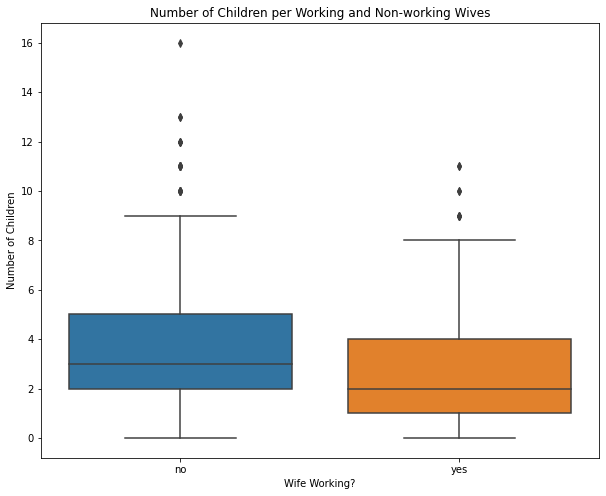

In [259]:
plt.figure(figsize=(10, 8))
df = birth_control.copy()
df['wife_work'] = df['wife_work'].replace(0,'yes')
df['wife_work'] = df['wife_work'].replace(1,'no')
sns.boxplot(data=df, x='wife_work', y='num_child')
plt.xlabel('Wife Working?')
plt.ylabel('Number of Children')
plt.title('Number of Children per Working and Non-working Wives');

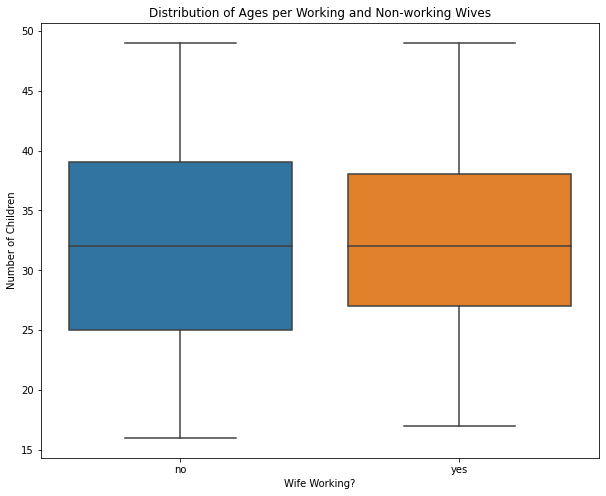

In [260]:
plt.figure(figsize=(10, 8))
sns.boxplot(data=df, x='wife_work', y='wife_age')
plt.xlabel('Wife Working?')
plt.ylabel('Number of Children')
plt.title('Distribution of Ages per Working and Non-working Wives');

*The boxplots above show the some variables differ between women who work and women who do not work. The distributuion of age for women who work and women who do not work is relatively similar (the median and range are very close). On the other hand, it looks like the distribution of the number of children they have is different between working and non-working women. Women who work have a slightly higher number of children (in terms of median). This visualization can be used to help us figure out what factors we could possibly use to help determine if a wife is working or not after having children. *

In [0]:
#Here we retrieve the training and validation sets for cross-validation
#work_train, work_val = train_test_split(train, test_size=0.1, random_state=42)

In [0]:
#plt.figure(figsize=(10, 8))
#sns.boxplot(data=birth_control, x='wife_work', y='num_child')
#plt.xlabel('Wife Working?')
#plt.ylabel('Number of Children')
#plt.title('Number of Children per Working and Non-working Wives');

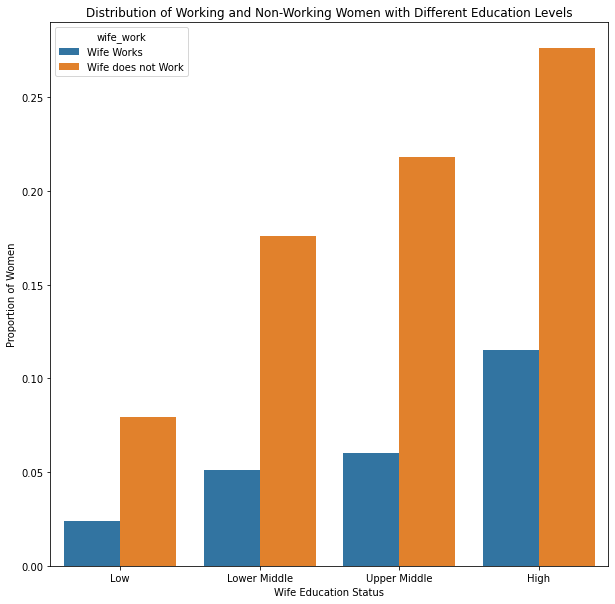

In [263]:
bc = birth_control.groupby(['wife_education','wife_work']).agg(len)
bc = bc.reset_index()
bc = bc.iloc[:,0:3]
bc = bc.rename(columns = {'wife_age':'Number of Women'})
bc['Number of Women'] = bc['Number of Women']/1473
bc['wife_work'] = bc['wife_work'].replace(0,'Wife Works')
bc['wife_work'] = bc['wife_work'].replace(1,'Wife does not Work')
plt.figure(figsize=(10,10))
fig = sns.barplot(x = 'wife_education', y = 'Number of Women', hue = 'wife_work', data = bc)
plt.xticks([0, 1, 2, 3], ["Low", "Lower Middle", "Upper Middle", 'High'])
fig.set_xlabel('Wife Education Status')
fig.set_ylabel('Proportion of Women')
fig.set_title('Distribution of Working and Non-Working Women with Different Education Levels');



The plot above shows that the proportion of women that work increases as education level increases. Furthermore, within each education level, the proportion of women that do not work is relativley half or less than half of the proportion of women that are working.

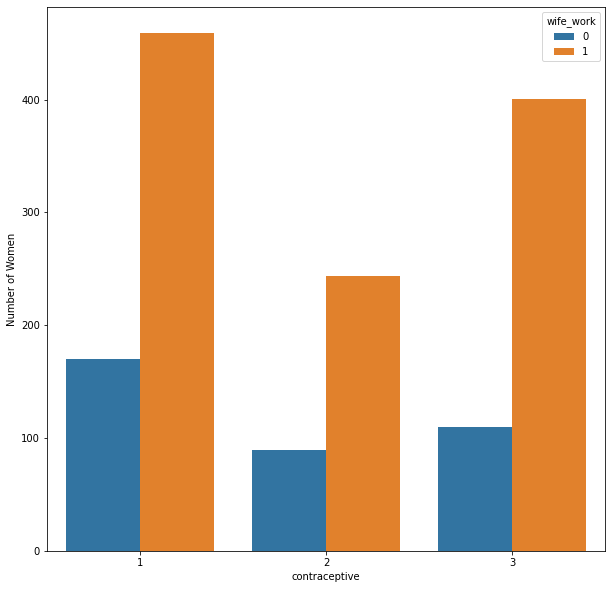

In [264]:
bc_religion = birth_control.groupby(['contraceptive','wife_work']).agg(len).reset_index().iloc[:,0:3].rename(columns={'wife_age':'Number of Women'})
plt.figure(figsize=(10,10))
fig = sns.barplot(x = 'contraceptive', y = 'Number of Women', hue = 'wife_work', data = bc_religion)

### **Method 1:Cross Validation**

## Features

We will perfrom cross validation to see what model will be the best without overfitting or underfitting.

In [0]:
#Standardizing Numerical Variables
def standardize(data):
  return ((data - np.mean(data))/np.std(data)).values

First we will one hot encode contraceptive and husband_occupation so we can include it as a features.


In [0]:
#One-hot-encoding type of contraceptive

def contraceptive(data='train'): 
  if (data=='test'):
    wife_ohe = pd.get_dummies(test['contraceptive'])
  elif (data=='val'):
    wife_ohe = pd.get_dummies(val['contraceptive'])
  else:
    wife_ohe = pd.get_dummies(train['contraceptive'])
  wife_ohe = wife_ohe.rename(columns={1: 'None', 2: 'Long Term', 3: 'Short Term'})
  return wife_ohe

In [0]:
#One-hot-encoding husband occupation
def husband_occupation(data='train'): 
  if (data=='test'):
    husb_ohe = pd.get_dummies(test['husband_occupation'])
  elif (data=='val'):
    husb_ohe = pd.get_dummies(val['husband_occupation'])
  else:
    husb_ohe = pd.get_dummies(train['husband_occupation'])
  
  return husb_ohe



In [0]:
#Creates dataframe with columns passed to it
def create_df(num_cols=[],ohe_cols=[], data = 'train'):
  if (data=='test'):
    df = test
  else:
    df = train
  original = df.copy() 
  original = original[num_cols]
  if 'wife_age' in num_cols:
    original['wife_age'] = standardize(original['wife_age'])
  if 'num_child' in num_cols:
    original['num_child'] = standardize(original['num_child'])
  if 'wife_edu' in ohe_cols:
    original = pd.concat([original, wife_edu(data)], axis=1)
  if 'husband_edu' in ohe_cols:
    original = pd.concat([original, husband_edu(data)], axis=1)
  if 'contraceptive' in ohe_cols:
    original = pd.concat([original, contraceptive(data)], axis=1)
  if 'living_standard' in ohe_cols:
    original = pd.concat([original, living_standard(data)], axis=1)
  if 'husband_occupation' in ohe_cols:
    original = pd.concat([original, husband_occupation(data)], axis=1)
  original.fillna(0) 
   
  
  return original.fillna(0)

In [0]:
chi_features = []
#features: wife_age
work1 = create_df(['wife_age'])
#features: num_child
work2 = create_df(['num_child'])
#featuers: num_child, wife_age
work3 = create_df(['num_child','wife_age'])
#features: wife_edu, contraceptive, living_standard
work4 = create_df([],['wife_edu','contraceptive','living_standard'])
#features: num_child, wife_edu, contraceptive
work5 = create_df(['num_child'],['wife_edu','contraceptive'])
#featuers: num_child, wife_age, wife_edu, contraceptive, living_standard
work6 = create_df(['num_child','wife_age'],['wife_edu','contraceptive','living_standard'])
#features: num_child, wife_age, wife_edu, contraceptive, living_standard, husband_occupation, husband_education
work7 = create_df(['num_child','wife_age'],['wife_edu','contraceptive','living_standard','husband_occupation','husband_education'])


chi_features = [work1,work2,work3,work4,work5,work6,work7]

In [0]:
#import sklearn
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, make_scorer

In [0]:
lr_model = LogisticRegression(penalty='l2', max_iter=1000)

In [272]:
Y_train_work = train['wife_work']
vals = []
for i in chi_features:
  cross_val = cross_val_score(lr_model,i,Y_train_work, scoring = make_scorer(accuracy_score),cv = 5)
  vals = np.append(vals,np.mean(cross_val))
print('Features Used: wife_age; Accuracy:',vals[0])
print('Features Used: num_child; Accuracy:',vals[1])
print('Features Used: num_child, wife_age; Accuracy:',vals[2])
print('Features Used: wife_edu, contraceptive, living_standard; Accuracy:',vals[3])
print('Features Used: num_child, wife_edu, contraceptive; Accuracy:',vals[4])
print('Features Used: num_child, wife_age, wife_edu, contraceptive, living_standard; Accuracy:',vals[5])
print('Features Used: num_child, wife_age, wife_edu, contraceptive, living_standard, huband_edu, husband_occupation; Accuracy:',vals[6])

Features Used: wife_age; Accuracy: 0.7471698113207547
Features Used: num_child; Accuracy: 0.7471698113207547
Features Used: num_child, wife_age; Accuracy: 0.7471698113207547
Features Used: wife_edu, contraceptive, living_standard; Accuracy: 0.7471698113207547
Features Used: num_child, wife_edu, contraceptive; Accuracy: 0.7471698113207547
Features Used: num_child, wife_age, wife_edu, contraceptive, living_standard; Accuracy: 0.7464150943396226
Features Used: num_child, wife_age, wife_edu, contraceptive, living_standard, huband_edu, husband_occupation; Accuracy: 0.7464150943396226


As you can, all the models have the same accuracy, which may mean that the features are co-related with one another and that they are not that good predictors of a wife's working status. 

### Logistic Regression with Chosen Model

Before creating the model, we will calculate the probability that the wife is working from the entire dataset we were given.

In [273]:
pr_working = np.mean(birth_control['wife_work'])
print("Proability of wife working:", pr_working)

Proability of wife working: 0.7494908350305499


In [274]:
lr_model = LogisticRegression(penalty='l2', max_iter=1000)
lr_model.fit(work5, Y_train_work)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [275]:
training_accuracy = (lr_model.predict(work5) == Y_train_work).mean()
print("Training Accuracy:", training_accuracy)

Training Accuracy: 0.7471698113207547


In [276]:
test_transformed = create_df(['num_child'],['wife_edu','contraceptive'],'test')
test_accuracy = (lr_model.predict(test_transformed) == test['wife_work']).mean()
print('Test Accuracy:', test_accuracy)

Test Accuracy: 0.7702702702702703


### Precision and Recall

In [0]:
Y_hat = lr_model.predict(work5)
Y = test['wife_work']

tp = (Y_train_hat == 1) & (Y_train == 1)
tn = (Y_train_hat != 1) & (Y_train != 1)
fp = (Y_train_hat == 1) & (Y_train != 1)
fn = (Y_train_hat != 1) & (Y_train == 1)

logistic_predictor_precision = np.sum(tp) / (np.sum(tp) + np.sum(fp))
logistic_predictor_recall = np.sum(tp) / (np.sum(tp) + np.sum(fn))
#logistic_predictor_far_3 = np.sum(fp3)/(np.sum(fp3)+ np.sum(tn3))

In [278]:
print('Precision:',logistic_predictor_precision)
print('Recall:',logistic_predictor_recall)

Precision: 0.40863787375415284
Recall: 0.4392857142857143


### **Method 2: Logistic Regression with Probability**

In [0]:
probs = lr_model.predict_proba(work5)

In [0]:
 def threshold_predict(model, X, threshold): 
    return np.where(lr_model.predict_proba(X)[:,1] > threshold, 1.0, 0.0)

In [0]:
def accuracy(threshold, X, Y):
    return np.mean(threshold_predict(lr_model, X, threshold) == Y)

In [0]:
thresholds = np.linspace(0, 1, 100)
X = work5.to_numpy()
Y = Y_train_work.to_numpy()
accs = [accuracy(t, X, Y) for t in thresholds]

In [0]:
def make_scorer(threshold, metric):
    return lambda model, x, y: metric(y, threshold_predict(model, x, threshold)) 

In [0]:
cv_accs = [
    np.mean(cross_val_score(lr_model, work5, Y_train_work, 
                            scoring=make_scorer(t, accuracy_score), 
                            cv=5))
    for t in thresholds
]

In [285]:
import plotly.express as px

fig = px.line(x=thresholds, y=cv_accs)
fig.update_xaxes(title="threshold")
fig.update_yaxes(title="Accuracy")

In [286]:
prob_training_accuracy= (np.where(lr_model.predict_proba(work5)[:,1]> 0.676, 1.0, 0.0).astype(int) == Y_train_work).mean()
print('Training Accuracy with adjusted Proability Threshold:', prob_training_accuracy)

Training Accuracy with adjusted Proability Threshold: 0.7222641509433962


In [287]:
prob_test_accuracy = (np.where(lr_model.predict_proba(test_transformed)[:,1] > 0.676,1.0,0.0).astype(int) == test['wife_work']).mean()
print('Test Accuracy with adjusted Probability Threshold:',prob_test_accuracy)

Test Accuracy with adjusted Probability Threshold: 0.7432432432432432


### **Method 3: Lasso Regularization**

In [288]:
 model_lasso.fit(work5, Y_train_work)
training_accuracy_lasso = (model_lasso.predict(work5) == Y_train_work).mean()
print("Training Accuracy:", training_accuracy_lasso)

Training Accuracy: 0.7471698113207547


In [289]:
test_accuracy_lasso = (model_lasso.predict(test_transformed) == test['wife_work']).mean()
print('Test Accuracy:',test_accuracy_lasso)

Test Accuracy: 0.7702702702702703


## **Clustering?**

## **Conclusion**